# Bank Marketing - Subscription Prediction

*   [Introduction](#Introduction)
    *   [Marketing](#Marketing)
    *   [Term deposit](#Term-deposit)
    *   [Term deposit Prediction](#Term-deposit-Prediction)
    *   [Machine Learning Classificaion problem](#Machine-Learning-Classification-problem)
    *   [Data Set information](#Data-Set-information)
*   [Data Exploration](#Data-Exploration)
    *   [Missing Data](#Missing-Data)
    *   [Statistical Overview of available data](#Statistical-Overview-of-available-data)
    *   [Exploring unique values](#Exploring-uniqu-values)
    *   [Numerical Features](#Numerical-Features)
    *   [Categorical Features](#Categorical-Features)
*   [Feature Engineering](#Feature-Engineering)
    *   [Labeled Encoding](#Labeled-Encoding)
    *   [Correlation Analysis](#Correlation-Analysis)
    *   [Dropping non-related columns](#Dropping-non-related-columns)
    *   [Removing outliers](#Removing-outliers)
    *   [One-Hot Encoding](#One-Hot-Encoding)
    *   [Issue of Imbalance data](#Issue-of-Imbalance-data)
*   [Testing Models](#Testin-Models)
    *   [Train-Test Split](#Train-Test-Split)
    *   [Executing Models](#Executing-Models)
    *   [Top 3 Models](#Top-3-Models)
    *   [Hyperparameter Tuning](#Hyperparameter-Tuning)
*   [Finalizing the Model](#Finalizing-the-Model)
    *   [ROC Curve](#ROC-Curve)
    *   [Automatic Links](#autolink)
    *   [Important Features](#Important-Features)
    *   [Deployment of the selected model](#Deployment-of-the-selected-model)
*   [Conclusion](#Conclusion)

## Introduction
- Lets try to understand the basic terminology and what are We trying to achieve in this project.

### Marketing
The action or business of promoting and selling products or services, including market research and advertising.
### Term deposit
Term Deposits are one of the best investment options for people who are looking for a stable and safe return on their investments. In Term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period. That is why they are called as Term Deposits because they are kept up to a particular term.
### Term deposit Prediction
With the help of a given dataset We have to come up with such a model that should be able to predict Whether a customer will subscribe for a term deposit or not.
### Machine Learning Classification problem
The problem is a Machine learning Supervised classification problem as our goal is to *classify* the customers among 'Subscribers' and 'Non-Subscribers'

## Data Set information

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset bank-additional-full.csv contains all examples (45211) with 17 features, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
### Attribute information
#### Input Variables
##### Bank Client Data
- age (numeric)  
-  job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
- marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
- education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
- default: has credit in default? (categorical: "no","yes","unknown")  
- housing: has housing loan? (categorical: "no","yes","unknown")  
- loan: has personal loan? (categorical: "no","yes","unknown")  

##### related with the last contact of the current campaign:
- contact: contact communication type (categorical: "cellular","telephone")  
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
- duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

##### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
- previous: number of contacts performed before this campaign and for this client (numeric)  
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  

##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)  
- cons.price.idx: consumer price index - monthly indicator (numeric)    
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)       
- euribor3m: euribor 3 month rate - daily indicator (numeric)  
- nr.employed: number of employees - quarterly indicator (numeric)  

#### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: "yes","no")  

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


## Data Exploration  
Here, we will try to get some insights from our data by using both traditional data exploration and modern day data visualization techniques.  
We will be using the following libraries.
- pandas *(for data manipulation and analysis)*
- numpy *(to perform array and mathematics based operations)*
- matplotlib and seaborn *(for visualization)*

### import pandas and numpy for Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 

df = pd.read_csv('bank/bank-additional-full.csv')
# df_add = pd.read_csv('bank-full.csv')
# df = pd.read_csv('bank/train.csv')
print('Total samples: ', len(df))

Total samples:  41188


In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For offline use
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

### Missing Data

In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

- The sum of missing values for each columns is 0.
- Hence, There are no missing values.

### Statistical Overview of available data

- We use panadas' describe function to get a *Statistical summary* of our dataframe.
- **Note:** By default, The describe() only gives tatistical summary of numerical data.

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Adding a new column by name 'subscribed' to store the value '1' if subscribed, else '0' 
df['subscribed'] = (df.subscribed == 'yes').astype('uint8')

In [6]:
df.replace('basic.4y', '4y', inplace=True)
df.replace('basic.6y', '6y', inplace=True)
df.replace('basic.9y', '9y', inplace=True)
df.replace('high.school', 'high_school', inplace=True)
df.replace('professional.course', 'pro_course', inplace=True)
df.replace('university.degree', 'uni_degree', inplace=True)
df.replace('illiterate', 'illtrt', inplace=True)
df.replace('unknown', 'unk', inplace=True)

#### Quick Observations on Numerical Data
- Total available data count is 45211 entries  
- Mean Age of the contacted customers is 41 years (Approx)  
- Mininmum Age of the contacted customers is 18 years
- Maximum Age of the contacted customers is 95 years
- Mean of call durationss is 258 seconds  
- Mean account balance for the customers 1362 euros  
- More than 75% of the the values in the column 'pdays' are set to -1. We know from our attribute informations that -1 means client was not previously contacted
- Just similar to the last observation more than 75% of the values inside the columns 'previous' which indicates how many times the customer was contacted before this campaign is 0 i. e. the customer is being contactedd forr the very first time.
- The values '-1' and '0' of the columns 'pdays' and 'previous' respectively are actually pointing towards the same fact.
- Because of the significant redundency of '0' and '-1' in their respective columns We might drop them later if their fluctuations do not show any relation with the outcome i. e. column 'y'.

- To get the *Statistical Summary* of the available categorical data, We need to specify the same as an argument to our describe function.

In [7]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,uni_degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


#### Quick Observation on Categorical Data
- Out of 45211, more than 44000 i. e. 97.3% customers do not have a credit. The number of customers with credit are negligible when compared to it. We might drop this column later.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high_school,unk,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high_school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high_school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,9y,unk,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,pro_course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unk,unk,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,pro_course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high_school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


- Let's have a look at how the data is distributed between subscribers and Non-Subscriber.

<AxesSubplot:xlabel='subscribed', ylabel='count'>

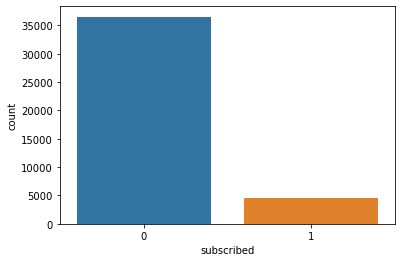

In [10]:
sns.countplot(x=df['subscribed'], data=df)

**Quick Observation** 
- 5289 Out of 45211 contacted customers subscribed

In [11]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

### Exploring unique values
- Checking if there are any unnecessary columns i.e. Columns with same type of informtion
- Finding categorical varieties

In [12]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,4y,no,no,no,telephone,may,mon
1,57,services,married,high_school,unk,no,no,telephone,may,mon
2,37,services,married,high_school,no,yes,no,telephone,may,mon
3,40,admin.,married,6y,no,no,no,telephone,may,mon
4,56,services,married,high_school,no,no,yes,telephone,may,mon


In [13]:
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [14]:
df.shape

(41188, 21)

In [15]:
# check unique values for every column
for feature in df.columns:
    print(f'{feature} : {df[feature].nunique()} unique values')

age : 78 unique values
job : 12 unique values
marital : 4 unique values
education : 8 unique values
default : 3 unique values
housing : 3 unique values
loan : 3 unique values
contact : 2 unique values
month : 10 unique values
day_of_week : 5 unique values
duration : 1544 unique values
campaign : 42 unique values
pdays : 27 unique values
previous : 8 unique values
poutcome : 3 unique values
emp.var.rate : 10 unique values
cons.price.idx : 26 unique values
cons.conf.idx : 26 unique values
euribor3m : 316 unique values
nr.employed : 11 unique values
subscribed : 2 unique values


### Numerical Features

In [16]:
numerical_data = [data for data in df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index]
numerical_data

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [17]:
df[numerical_data].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Distribution of values for each numerical column.

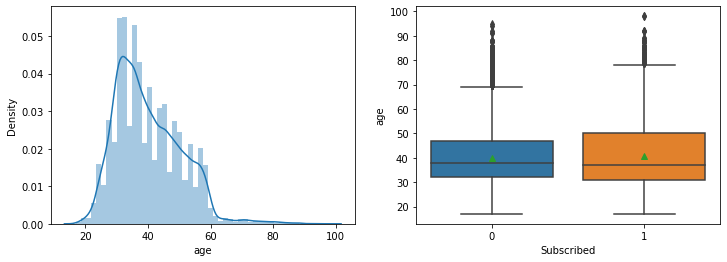

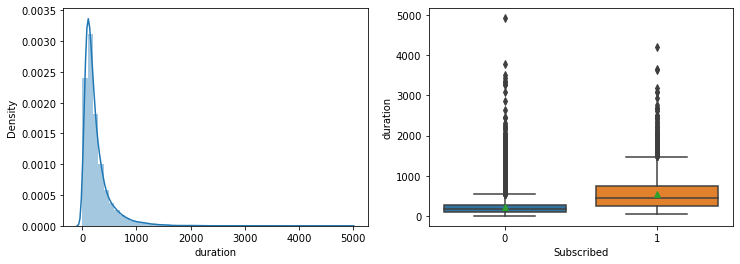

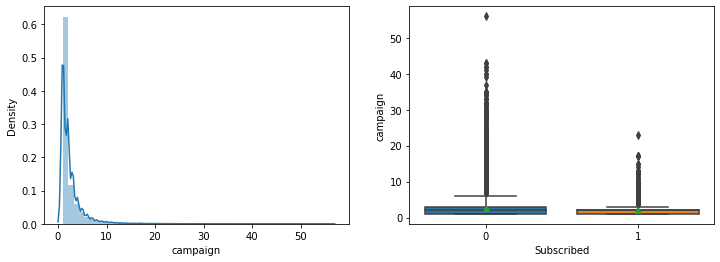

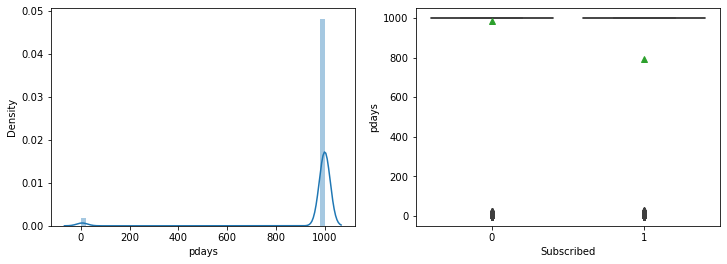

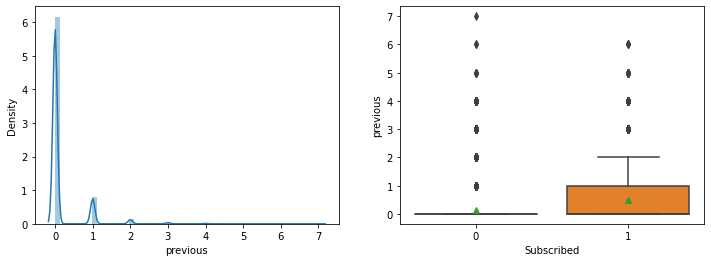

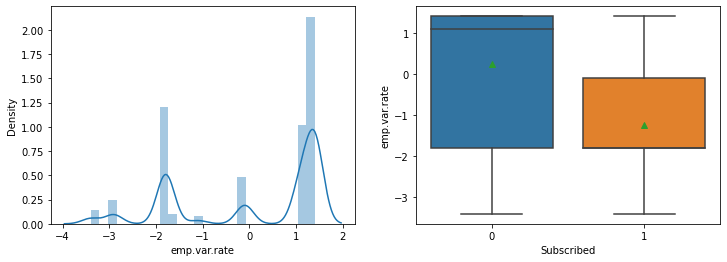

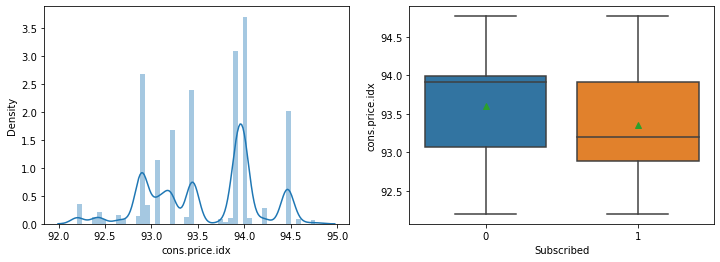

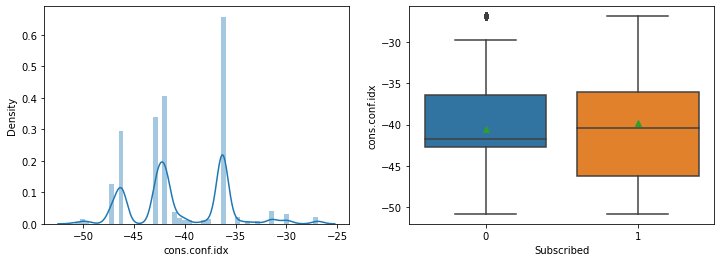

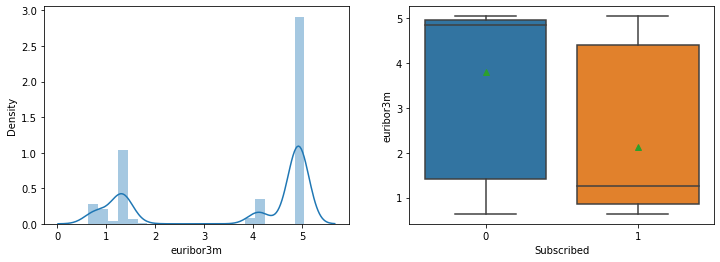

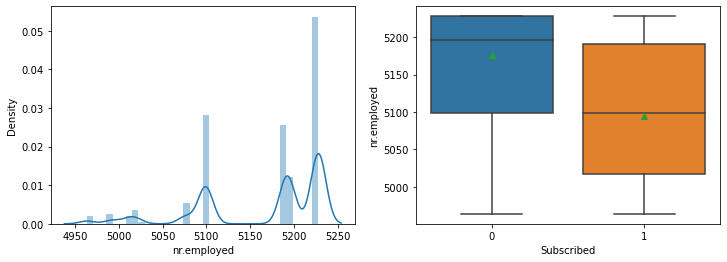

In [18]:
#creating distribution and box plots
for col in numerical_data : 
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='subscribed', y = col, data =df, showmeans = True)
    plt.xlabel('Subscribed')
    plt.ylabel(col)
    
    plt.show()

**Observations:** 
- From the Density and boxplot shown above we can say that the customerrs with longer call durations are more likely to subscribe for the term deposit
- Most of the customers who actually subscribed were contacted for the very first time
- Except for the column of age and days, all the other numerical features seems to be left skewed.

### Exploring the frequencies of Numerical features with Count plots

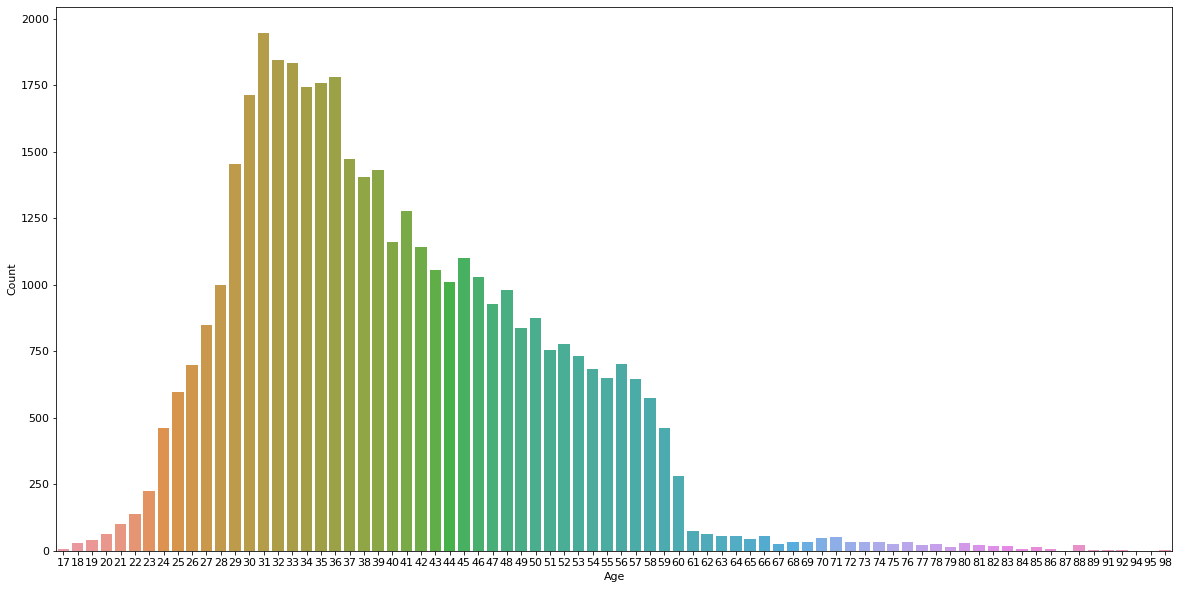

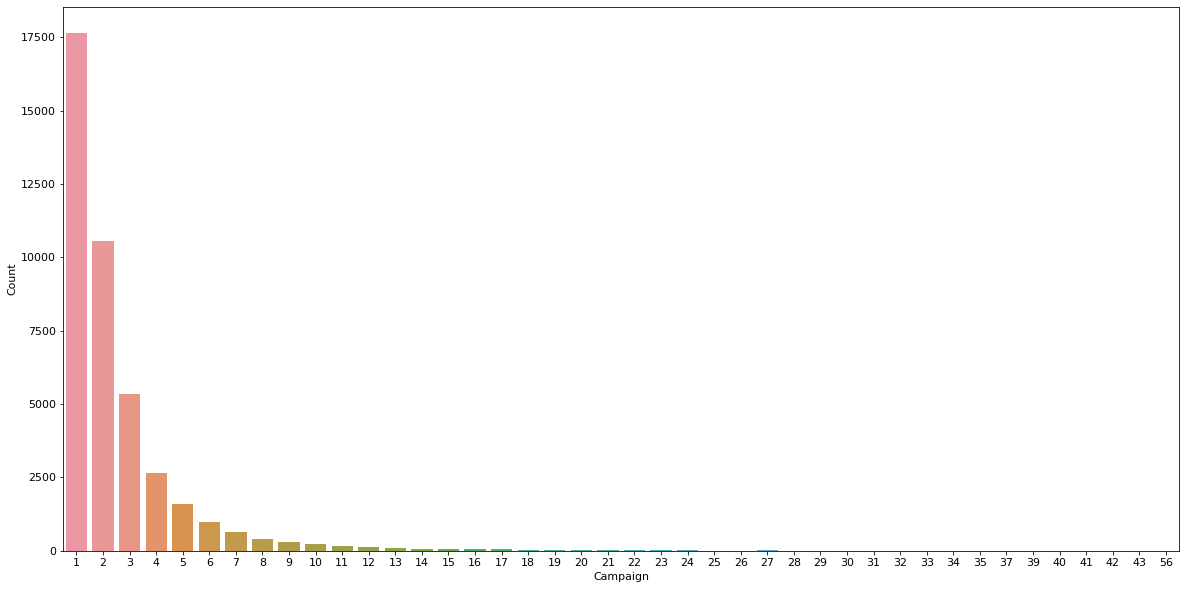

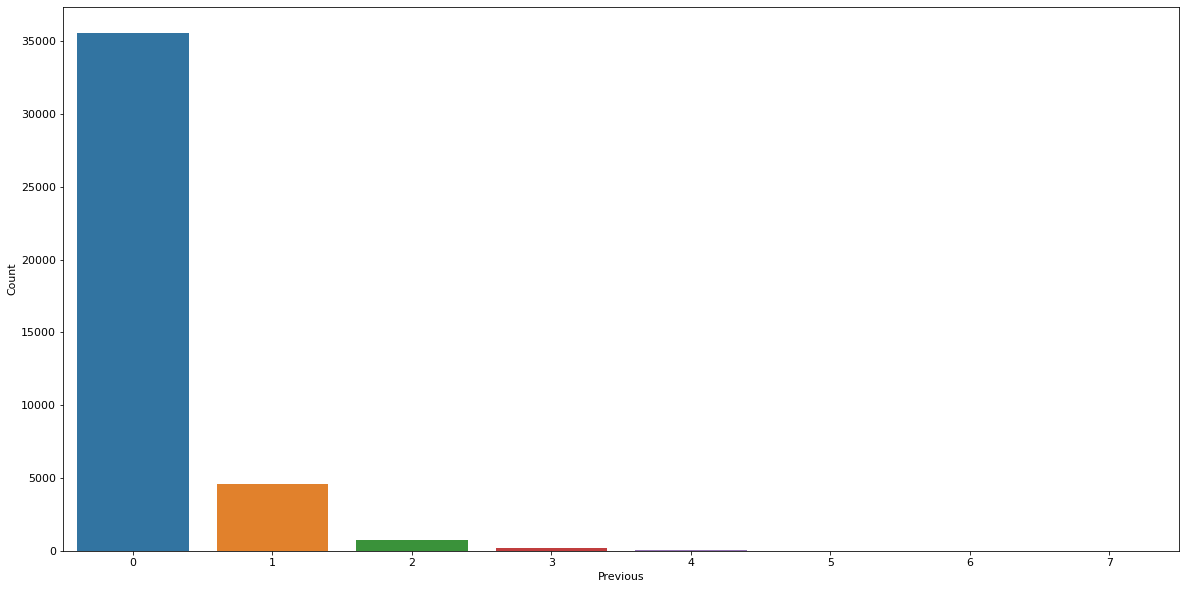

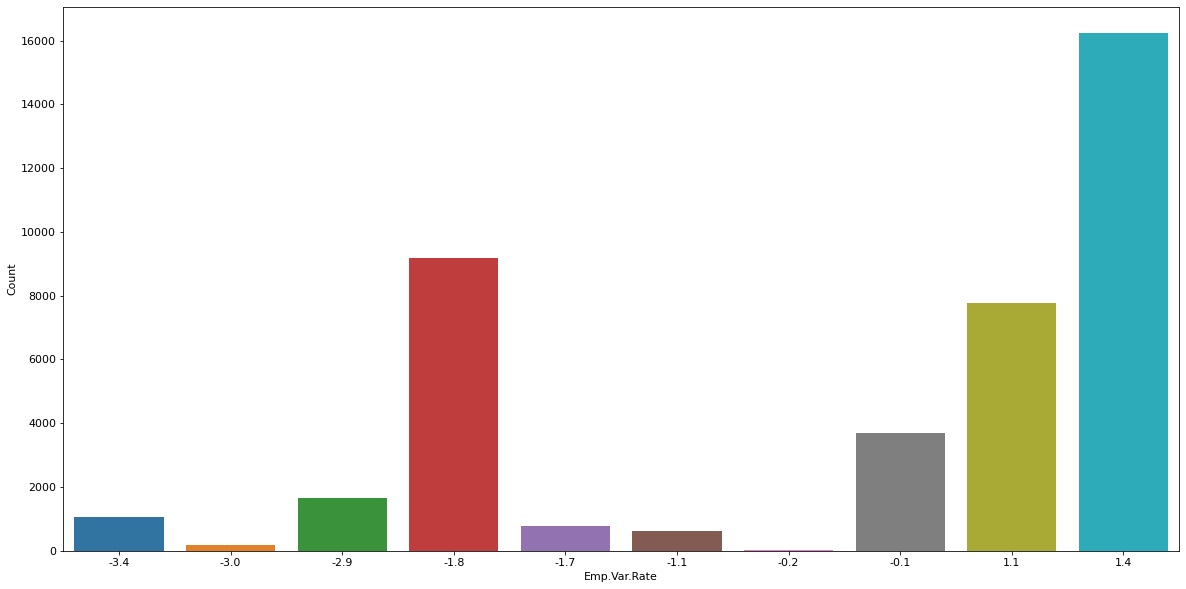

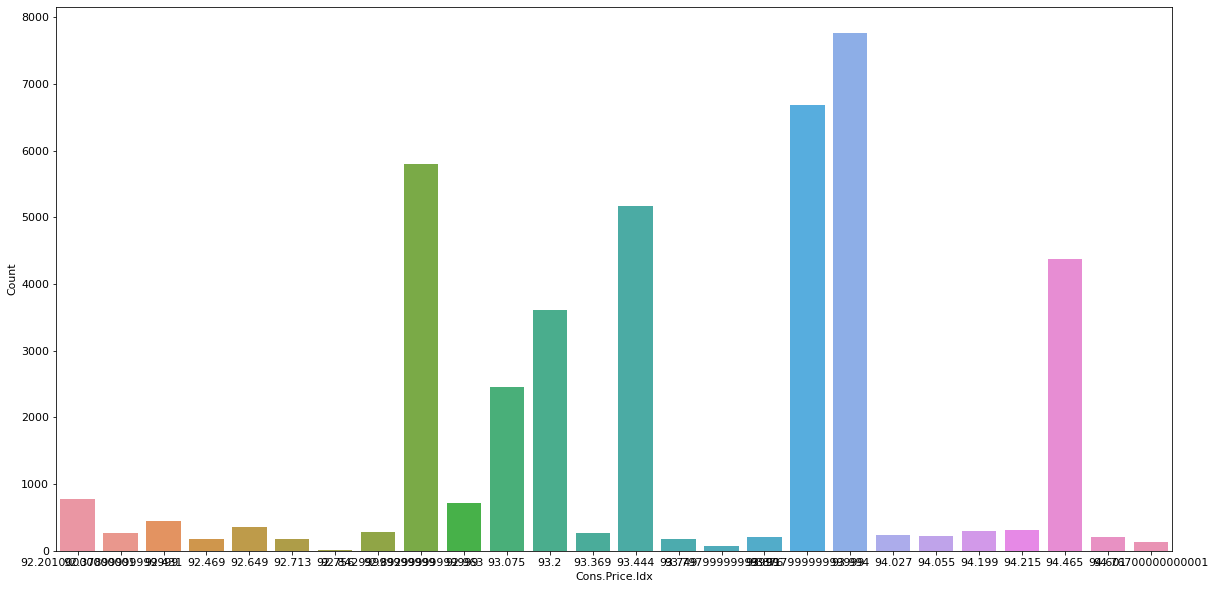

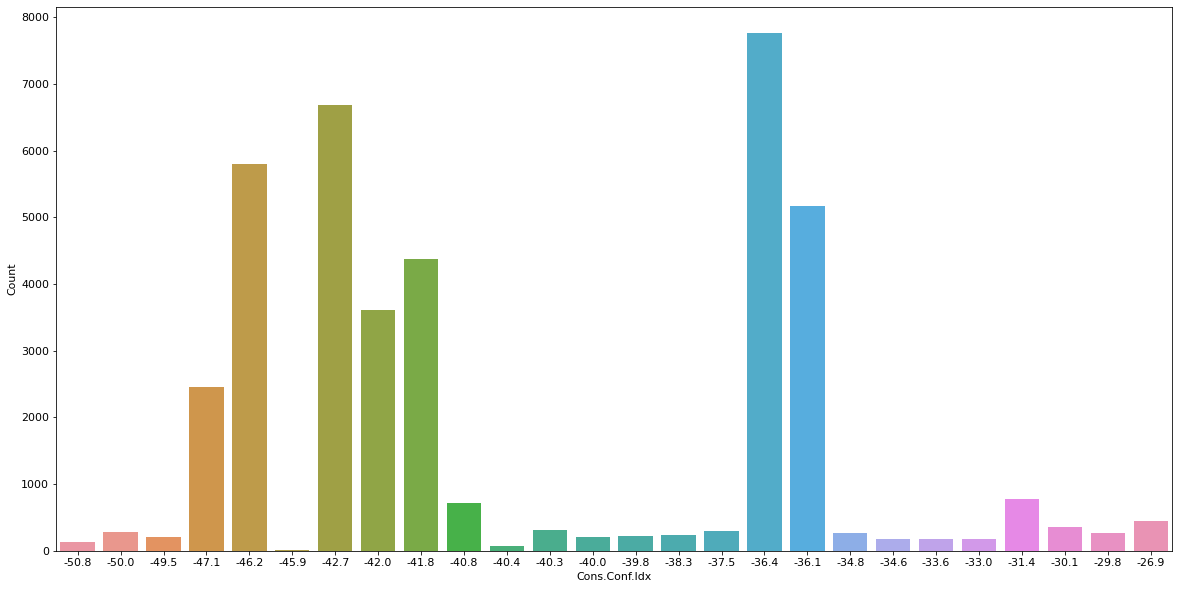

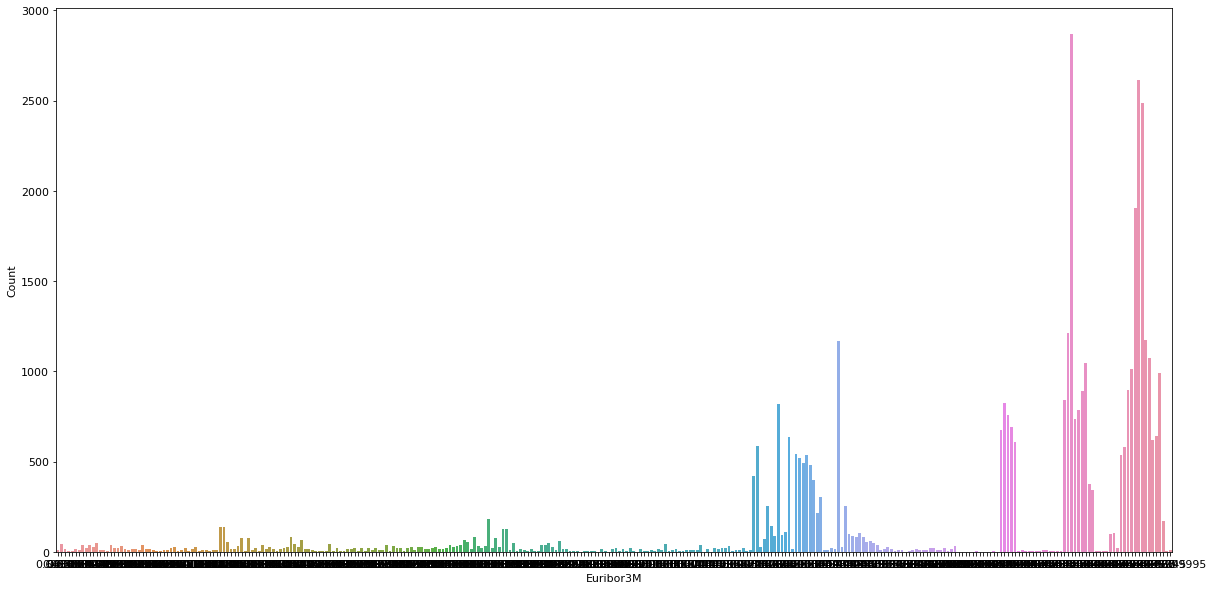

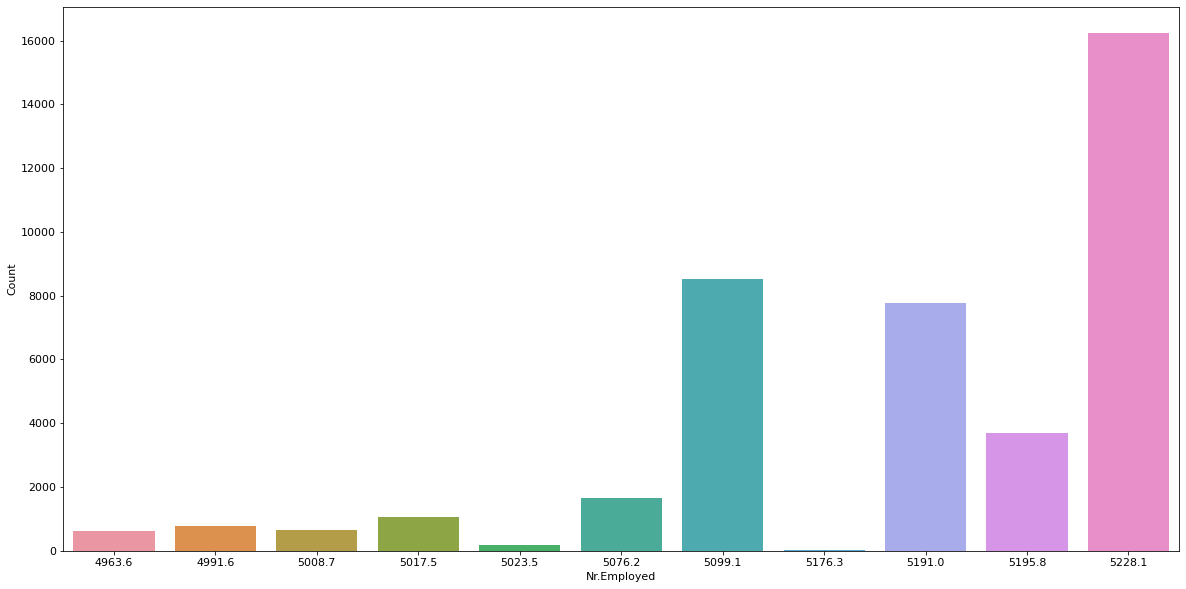

In [19]:
plt.rcParams.update({'font.size': 11})
for col in numerical_data : 
    if col not in ['balance', 'duration', 'pdays']:
        plt.figure(figsize=(20,10))
        plt.subplot().patch.set_visible(False)
        sns.countplot(x = df[col], data = df)
        plt.xlabel(col.title())
        plt.ylabel('Count')

        plt.show()

- The values for columns Balance, duration, and pdays are distributed at larger intervals hence can be visualized with histograms.

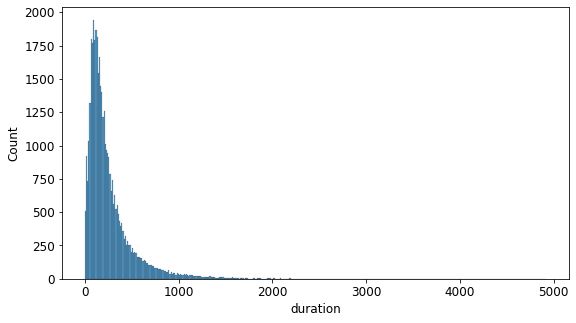

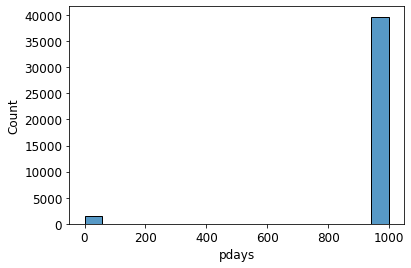

In [20]:
plt.subplots(figsize=(20,5)) 
plt.rcParams.update({'font.size': 12})
    
# plt.subplot(1, 2, 1)
# sns.histplot(x = df['balance'], data = df)
# plt.ylabel('Count')

plt.subplot(1, 2, 1)
sns.histplot(x = df['duration'], data = df)
plt.ylabel('Count')
plt.show()

plt.subplot()
sns.histplot(x = df['pdays'], data = df)
plt.ylabel('Count')

plt.show()

**Observations**
- The maximum targeted age group is 30 to 37 Years old with more than 2000 people of age 32
- More than 2500 people were contacted on 20th day of the month
- more than 17500 customers were contacted only once during the campaign

## Categorical Features

Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

In [21]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

### Graphical Representation of Categorical Features
- Using countplots to check the frequencies of values for each category

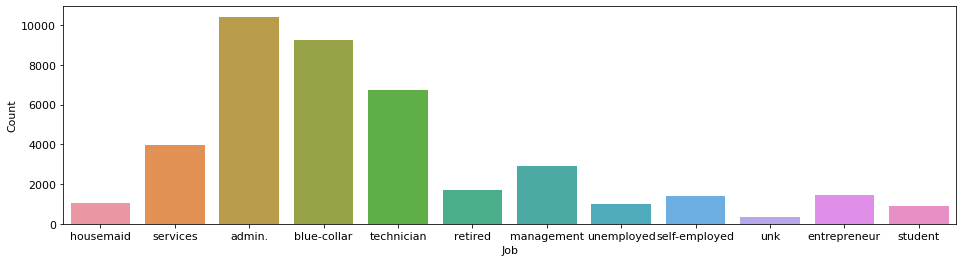

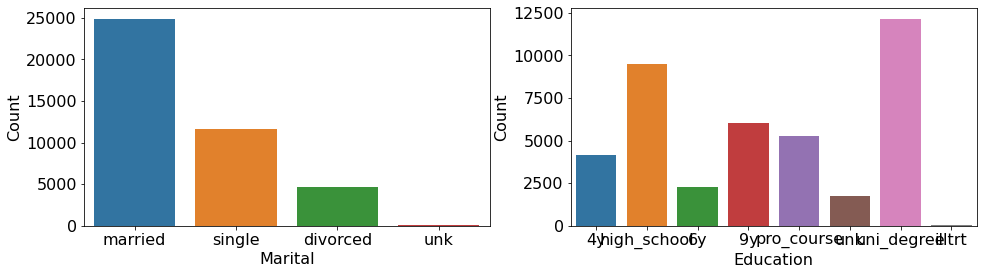

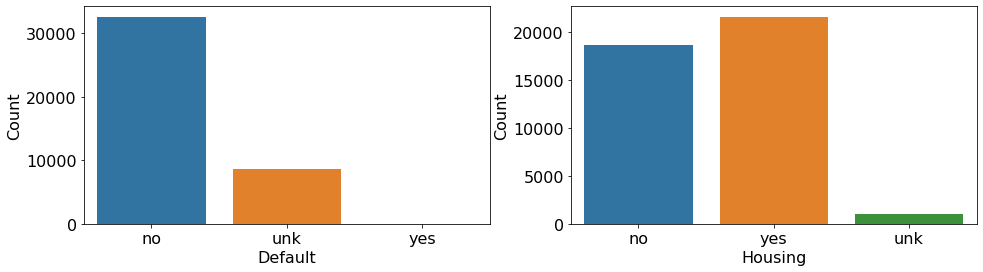

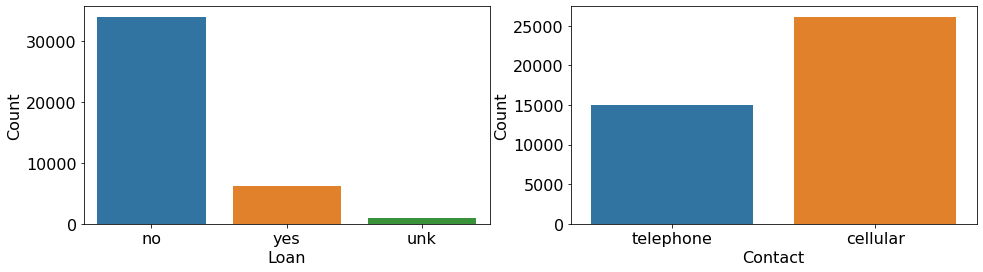

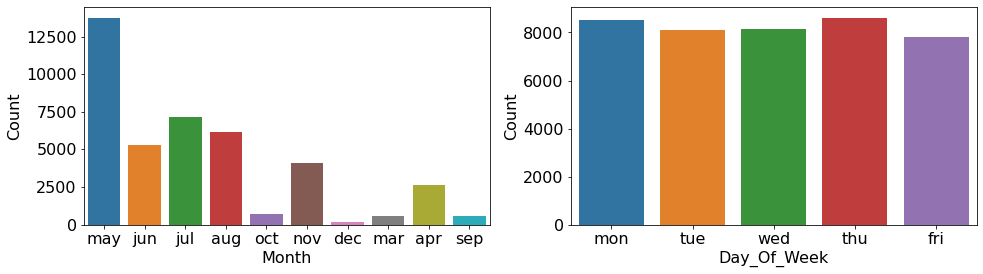

In [22]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
                 
    plt.subplot(1, 2, 2)
    column_name = object_data[col_index]
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
    
    plt.show()

- Showcasing the above data in tabular form

In [23]:
# frequency of particular value in a columns where 
# for column in object_data:
#     print(f'{df.groupby(column).size()}\n')

**Observations**
- We can see the most of the targeted customers are either in management or are blue-coller (9000+ each)
- More than 25000 of the customers are married
- 20000+ customers have received secondary education
- 40000+ customers do not have any credit
- Around 25000+ have taken a housing loan
- 35000+ People do not have any kind of personal loan
- Around 30000+ people were contacted over cellular phones
- Most of the customers were contacted in the month of May
- Most of the people are being contacted for the very first time hence most of the values in the column poutcomee are unknown
- 5289 Out of 45211 contacted customers subscribed

**Let's see distribution of subscribers and non-subscribers for categorical values**

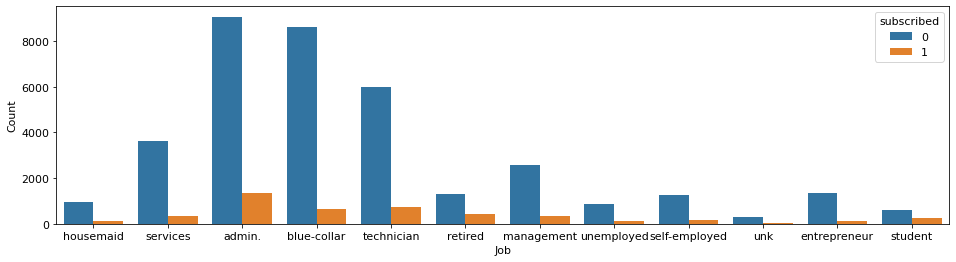

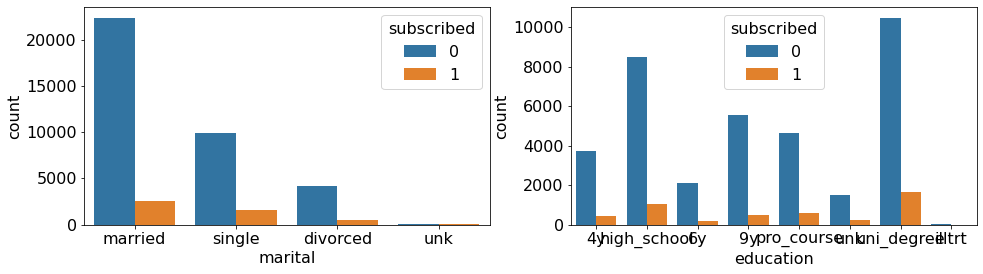

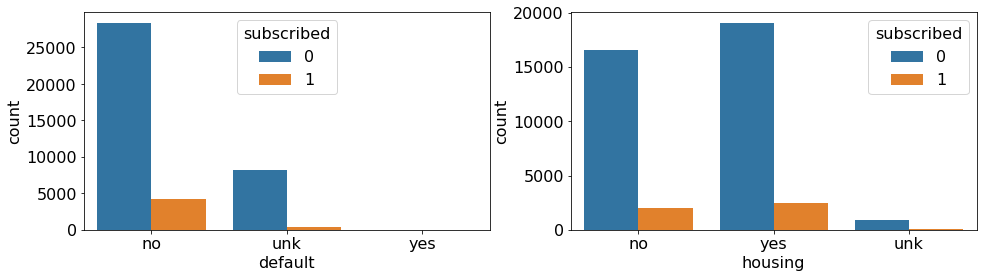

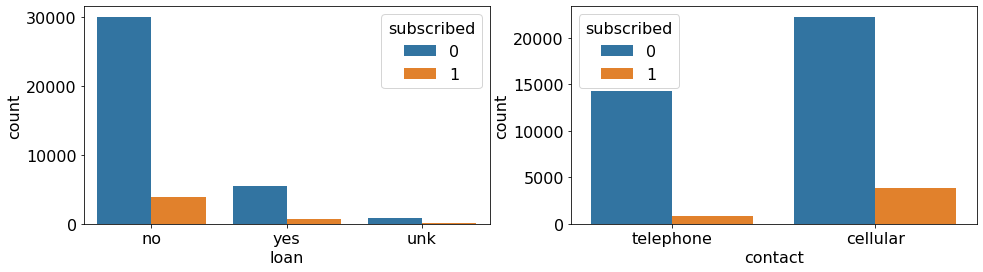

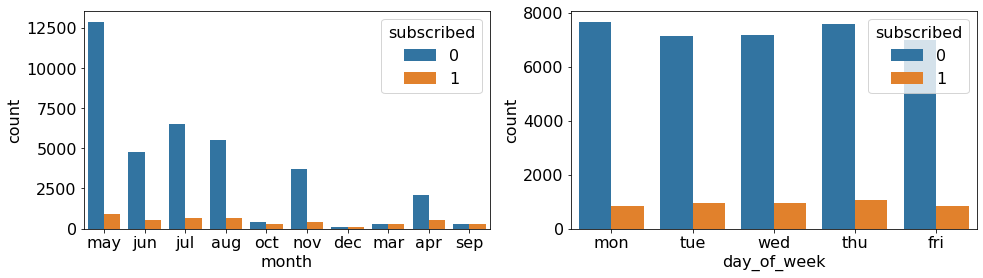

In [24]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], hue='subscribed', data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

# plt.show()

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='subscribed',data=df)
    
    column_name = object_data[col_index]
    plt.subplot(1, 2, 2).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='subscribed',data=df)
    
#     plt.show()

**Let's see the above information in tabular form.**

In [25]:
# for col in object_data:
#     print(df.groupby(['subscribed', col]).size())
#     print()

**Obeservations**
- The customerrs in job category 'retired' have shown higher interest in the term deposit as compared to the others.
- Customers with a tertiary level of education were more like to subscribe for the term deposit.
- The people who do not have a credit have shown interest in the term deposit.
- The people who do not have a housing loan have shown relatively higher interest in the term deposit.
- Customers who were contacted during the month of March, September, December, and October repectively have mostly subscribed to the term deposit.

## Feature Engineering

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data.Here, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.

### Correlation Analysis
Correlation Analysis is statistical method that is used to discover if there is a relationship between two variables/datasets, and how strong that relationship may be.  

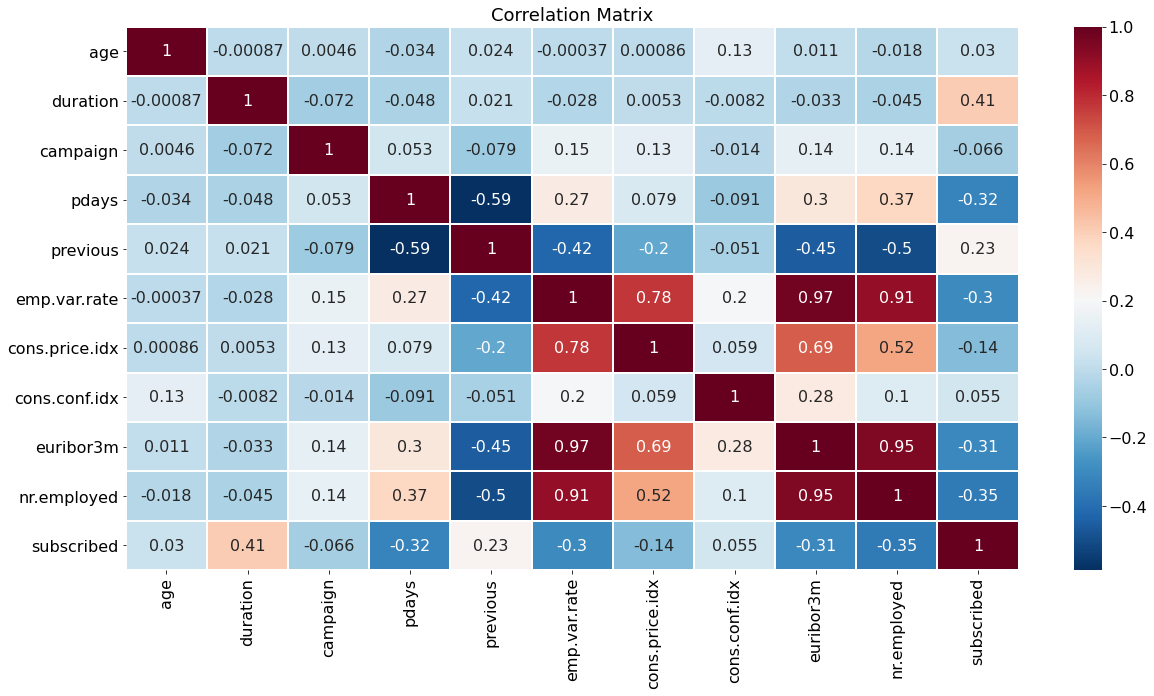

In [26]:
plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(), cbar=True, cmap="RdBu_r", linewidths=1, annot=True)
plt.title("Correlation Matrix", fontsize=18)
plt.show()

### Labeled Encoding

We are performing the Labeled encoding in which we will assign specific Numerical values to some categorical columns. We need to perform some kind of encoding as We will need to have our feaures in Numerical form before we try to run any Model with them or even if we want to find their correlation with other features.  

In [27]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [28]:
encoded_df = df.copy()

In [29]:
encoded_col_names = []
for col in object_data:
    encoded_df[col] = df[col].astype('category')
    encoded_df[col+"_encoded"] = encoded_df[col].cat.codes
    encoded_col_names.append(col+"_encoded")
encoded_df.dtypes

age                       int64
job                    category
marital                category
education              category
default                category
housing                category
loan                   category
contact                category
month                  category
day_of_week            category
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
poutcome               category
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
subscribed                uint8
job_encoded                int8
marital_encoded            int8
education_encoded          int8
default_encoded            int8
housing_encoded            int8
loan_encoded               int8
contact_encoded            int8
month_encoded              int8
day_of_week_encoded        int8
poutcome_encoded           int8
dtype: o

In [30]:
encoded_df[encoded_col_names]

,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1
41184,1,1,5,0,0,0,0,7,0,1
41185,5,1,6,0,2,0,0,7,0,1
41186,9,1,5,0,0,0,0,7,0,1


In [31]:
encoded_df.drop(object_data, axis=1, inplace=True)
encoded_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribed', 'job_encoded', 'marital_encoded', 'education_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
       'month_encoded', 'day_of_week_encoded', 'poutcome_encoded'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

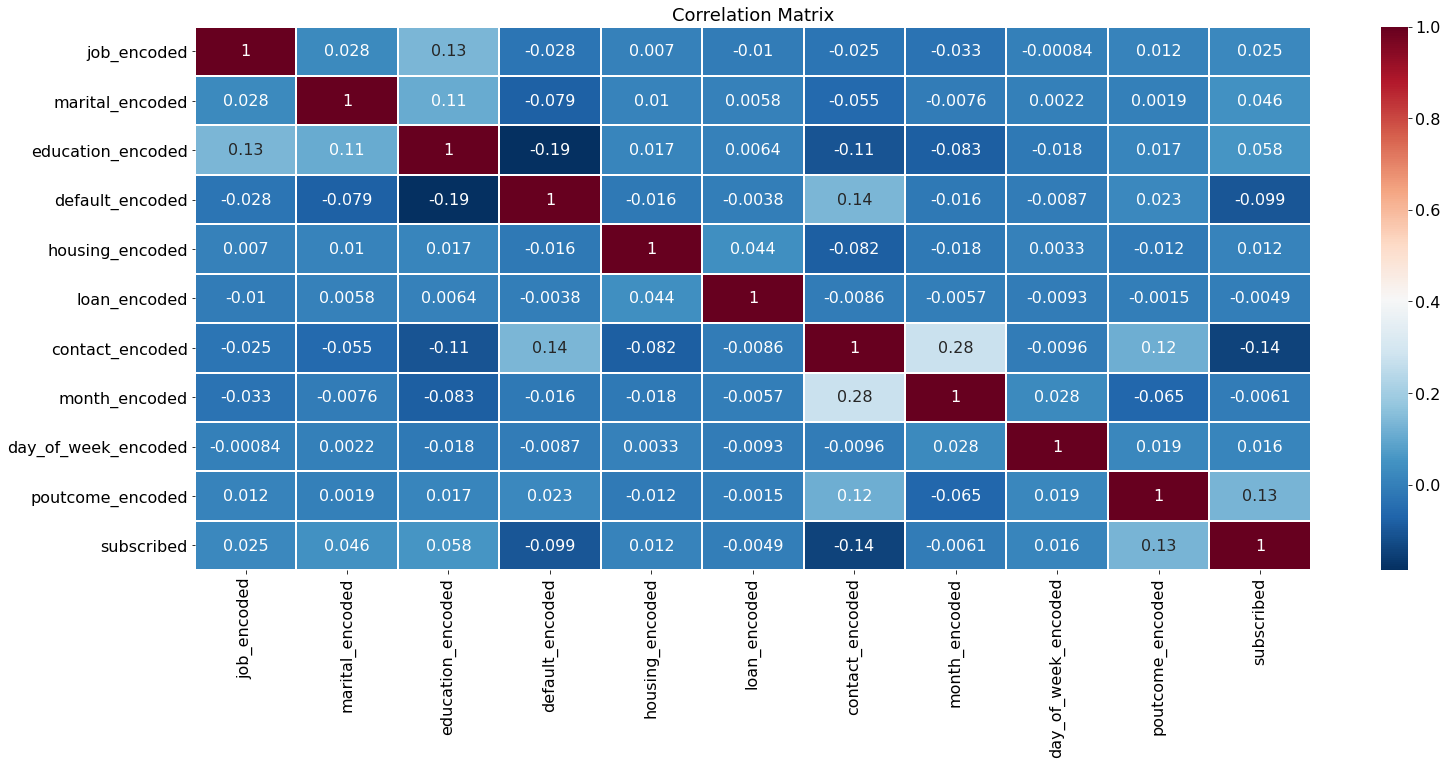

In [32]:
encoded_col_names.append('subscribed')

plt.subplots(figsize=(25,10)) 
sns.heatmap(encoded_df[encoded_col_names].corr(), cbar=True, cmap="RdBu_r",linewidths=1, annot=True)
plt.title("Correlation Matrix", fontsize=18)
# plt.show()

**Checking Non-Significant and redundant columns**
- Before deciding to drop any of the available columns We will  run a final check on the suspected columns.

In [33]:
#defaut feature does not play imp role
print(df.groupby(['default']).size())
print(df.groupby(['subscribed','default']).size())

default
no     32588
unk     8597
yes        3
dtype: int64
subscribed  default
0           no         28391
            unk         8154
            yes            3
1           no          4197
            unk          443
dtype: int64


- We are replacing the value '-1' in the column 'pdays' with 0 as -1 is the most frequent value in the column and it can affect the calculations later.

In [34]:
df['pdays'] = (df.pdays != 999).astype('uint8')

### Dropping non-related columns
- We are dropping the columns 'duration', 'month', 'day_of_week', and 'campaign' as these variables can be available only after we have reached out to a customer, hence these do not contribute in the targeting.

In [35]:
df.drop(['duration', 'month', 'day_of_week', 'campaign'], axis=1, inplace= True)

In [36]:
df.shape

(41188, 17)

In [37]:
# Updating Object data list
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

### Outliers
An outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.
### Removing outliers

In [38]:
def remove_outliers(data, column , minimum, maximum):
    col_values = data[column].values
    data[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return data

In [39]:
min_val = df["age"].min()
max_val = 80
df = remove_outliers(data=df, column='age' , minimum=min_val, maximum=max_val)

### One-Hot Encoding
One-Hot Encoding is a popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

In [40]:
#with one hot encoding
df_ohe = df.copy()
obj_data_ohe = pd.get_dummies(df_ohe[object_data],drop_first = True)
obj_data_ohe.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_unk,default_unk,default_yes,housing_unk,housing_yes,loan_unk,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [41]:
df_ohe = pd.concat([df_ohe, obj_data_ohe], axis=1)
df_ohe.drop('subscribed', axis=1, inplace=True)
df_ohe['subscribed'] = df['subscribed']

In [42]:
df_ohe.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unk',
       'marital_married', 'marital_single', 'marital_unk', 'education_6y',
       'education_9y', 'education_high_school', 'education_illtrt',
       'education_pro_course', 'education_uni_degree', 'education_unk',
       'default_unk', 'default_yes', 'housing_unk', 'housing_yes', 'loan_unk',
       'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'subscribed'],
      dtype='object')

In [43]:
# Dropping object data from dataframe df_ohe, as we are going to use the encoded columns
df_ohe.drop(object_data, axis=1, inplace=True)

In [44]:
df_ohe.keys()

Index(['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unk', 'marital_married', 'marital_single',
       'marital_unk', 'education_6y', 'education_9y', 'education_high_school',
       'education_illtrt', 'education_pro_course', 'education_uni_degree',
       'education_unk', 'default_unk', 'default_yes', 'housing_unk',
       'housing_yes', 'loan_unk', 'loan_yes', 'contact_telephone',
       'poutcome_nonexistent', 'poutcome_success', 'subscribed'],
      dtype='object')

In [45]:
df_ohe.shape

(41188, 39)

### Issue of Imbalance data
- We can see the distribution of our target feature is highly towards 0, i.e. the customers who are not going to subscribe.
- About 90% of the target varible is in 0
- Using such a sample to create for prediction may create a Model which is Biased to give a negative  predictions.

<AxesSubplot:xlabel='subscribed', ylabel='count'>

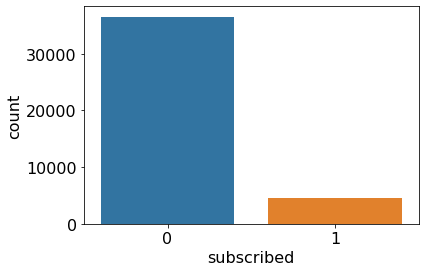

In [46]:
sns.countplot(x=df['subscribed'], data=df)

#### Solution
After splitting the data into traing and testing datasets we can either perform **Oversampling** or **Undersampling** on our data.
- Oversampling
 - We can try replicating the entries with a positive output in such a way that it reduces or equalizes the difference between the number of postive and negative ooutcomes.
- Undersampling
 - We can try reducing those entries which are from higher frequent class
 
**Note:** It is important to perform oversampling only after train_test_split as it will otherwise cause Data Leakage which will lead to predictions with tremendous falls accuracy

### Summary of Feature engneering

In [47]:
print('Total number of features:', len(df_ohe.keys()))
print('Numerical Features:',len(df_ohe.keys()) - len(obj_data_ohe.keys()))
print('Encoded Categorical Features:', len(obj_data_ohe.keys()))

Total number of features: 39
Numerical Features: 9
Encoded Categorical Features: 30


In [48]:
# Checking for any null values
df_ohe.isnull().sum().sort_values(ascending = False)

subscribed               0
job_entrepreneur         0
job_technician           0
job_student              0
job_services             0
job_self-employed        0
job_retired              0
job_management           0
job_housemaid            0
job_blue-collar          0
job_unk                  0
nr.employed              0
euribor3m                0
cons.conf.idx            0
cons.price.idx           0
emp.var.rate             0
previous                 0
pdays                    0
job_unemployed           0
marital_married          0
poutcome_success         0
default_unk              0
poutcome_nonexistent     0
contact_telephone        0
loan_yes                 0
loan_unk                 0
housing_yes              0
housing_unk              0
default_yes              0
education_unk            0
marital_single           0
education_uni_degree     0
education_pro_course     0
education_illtrt         0
education_high_school    0
education_9y             0
education_6y             0
m

In [49]:
# Copying data to a new dataframe, which includes the columns of interest.
df_model = df_ohe.copy()
print("Columns of our interest:")

df_model.columns

Columns of our interest:


Index(['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unk', 'marital_married', 'marital_single',
       'marital_unk', 'education_6y', 'education_9y', 'education_high_school',
       'education_illtrt', 'education_pro_course', 'education_uni_degree',
       'education_unk', 'default_unk', 'default_yes', 'housing_unk',
       'housing_yes', 'loan_unk', 'loan_yes', 'contact_telephone',
       'poutcome_nonexistent', 'poutcome_success', 'subscribed'],
      dtype='object')

In [50]:
df_model[df_model.columns[:15]].head()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services
0,56.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0
1,57.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1
2,37.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1
3,40.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0
4,56.0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1


In [51]:
df_model[df_model.columns[15:]].head()

,job_student,job_technician,job_unemployed,job_unk,marital_married,marital_single,marital_unk,education_6y,education_9y,education_high_school,...,default_unk,default_yes,housing_unk,housing_yes,loan_unk,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,subscribed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0


In [52]:
df_model.columns

Index(['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unk', 'marital_married', 'marital_single',
       'marital_unk', 'education_6y', 'education_9y', 'education_high_school',
       'education_illtrt', 'education_pro_course', 'education_uni_degree',
       'education_unk', 'default_unk', 'default_yes', 'housing_unk',
       'housing_yes', 'loan_unk', 'loan_yes', 'contact_telephone',
       'poutcome_nonexistent', 'poutcome_success', 'subscribed'],
      dtype='object')

In [53]:
df_model.corr()['subscribed'].sort_values()

# nr.employed             -0.364252
# euribor3m               -0.315902
# emp.var.rate            -0.305392
# contact_telephone       -0.143877
# cons.price.idx          -0.128773
# month_may               -0.112555
# job_blue-collar         -0.067467
# campaign                -0.055065
# cons.conf.idx            0.061635
# month_dec                0.074598
# job_student              0.088611
# job_retired              0.102368
# month_sep                0.124372
# month_oct                0.141352
# month_mar                0.146293
# previous                 0.227989
# pdays                    0.270242
# poutcome                 0.319868
# subscribed               1.000000

nr.employed             -0.354678
euribor3m               -0.307771
emp.var.rate            -0.298334
poutcome_nonexistent    -0.193507
contact_telephone       -0.144773
cons.price.idx          -0.136211
default_unk             -0.099293
job_blue-collar         -0.074423
education_9y            -0.045135
marital_married         -0.043398
job_services            -0.032301
education_6y            -0.023517
job_entrepreneur        -0.016644
education_high_school   -0.007452
job_housemaid           -0.006505
job_technician          -0.006149
job_self-employed       -0.004663
loan_yes                -0.004466
default_yes             -0.003041
housing_unk             -0.002270
loan_unk                -0.002270
job_management          -0.000419
job_unk                 -0.000151
education_pro_course     0.001003
marital_unk              0.005211
education_illtrt         0.007246
housing_yes              0.011743
job_unemployed           0.014752
age                      0.015680
education_unk 

In [54]:
df_model.shape

(41188, 39)

In [55]:
df_model.to_csv('model.csv', index=False)

## Testing Models

In [56]:
import time

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [57]:
from time import time

aucs = []
names = []

def get_report(name, classifier, x_train, y_train, y_test, y_pred, y_train_pred):
    names.append(name)
    s_time = time()
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
    
    report = ''
    
    report += f'Train Report for {classifier}\n'
    
    report += f'{classifier} Confusion  matrix:\n'
    report += f'{confusion_matrix(y_train, y_train_pred)}\n\n'
    report += f'accuracy mean: {accuracies.mean()}\n'
    report += f'accuracy std dev: {accuracies.std()}\n'
    report += f'preciosn score: {precision_score(y_train, y_train_pred)}\n'
    report += f'recall score: {recall_score(y_train, y_train_pred)}\n'
    report += f'f1 score: {f1_score(y_train, y_train_pred)}\n'
    auc = roc_auc_score(y_train, y_train_pred)
    report += f'AUC train: {auc}\n\n'
    
    report += f'Test Report for {classifier}\n'
    
    report += f'{classifier} Confusion  matrix:\n'
    report += f'{confusion_matrix(y_test, y_pred)}\n\n'
    accuracies = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)
    report += f'accuracy mean: {accuracies.mean()}\n'
    report += f'accuracy std dev: {accuracies.std()}\n'
    report += f'preciosn score: {precision_score(y_test, y_pred)}\n'
    report += f'recall score: {recall_score(y_test, y_pred)}\n'
    report += f'f1 score: {f1_score(y_test, y_pred)}\n'
    auc = roc_auc_score(y_test, y_pred)
    report += f'AUC test: {auc}\n'
    

    aucs.append(auc)
    
#     report += f'\nClassification report: \n{classification_report(y_test, y_pred)}'
    report += f'\nTime taken: {time() - s_time}\n'
    report += '*'*50
    
    return report

### Train-Test Split
We will split the datasets in **Train** and **Test**.
- 75% of the available data will be used for training
- Remaining 25% of the available data will be used for testing

In [58]:
x = df_model.drop('subscribed',axis = 1)
y = df_model['subscribed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [59]:
#Oversampling the train data
from imblearn.over_sampling import RandomOverSampler, SMOTE

os=RandomOverSampler()
# os=SMOTE()
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(len(y_train)))
print("The number of classes after fit {}".format(len(y_train_ns)))
x_train = x_train_ns
y_train = y_train_ns

The number of classes before fit 28831
The number of classes after fit 51160


In [60]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
# scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [61]:
pca = PCA(n_components=10)
pca.fit(x_train_scaled)
x_train = pca.transform(x_train_scaled)
x_test = pca.transform(x_test_scaled)

In [62]:
x_test.shape

(12357, 10)

### Executing Models
We will first run test the following models to see which models can provide us some promising results.
- Logistic Regression
- KNeighbors Classifier
- Gaussian Naive Bayes
- Decision-Tree Classifier
- Random-Forest Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier

**Loigistic Regression**  
Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables. The "S-shaped" curve (on the line graph) will show the probability of the dependent variable occuring based on where the points of the independent variables lands on the curve. In this case, the output (y) is predicted by the numerical and categorical variables defined as "x" such as age, education and so on. Logistic regresssion is best used for classifying samples.

**K nearest neighbours (KNN)**  
K Nearest Neighbors looks at the k closest datapoints and probability sample that has positive labels. It is easy to implement, and you don't need an assumption for the data structure. KNN is also good for multivariate analysis.

**Naive Bayes**  
Naive Bayes assumes that all variables in the dataset are independent of each other. Meaning that there are no dependent variables or output. This algorithm uses Bayes rule which calculated the probability of an event related to previous knowledge of the variables concerning the event. This won't really work in this case since we have an output of the bank customers who will get a bank deposit. This process is better for tasks such as image processing.

**Decision Tree Classifier**  
Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer. Because of this decision making process, this algorithm has no assumptions about the structure of the data, but instead decides on the path to take through each decision the algorithm performs.

**Random Forest**  
Random forest works like a decision tree algorithm but it performs various decision tree analysis on the dataset as a whole. That is, it is the bigger version of the decision tree; a forest is bigger than a tree, you can think of it that way. Random forest takes random samples of trees and it works faster than the decision tree algorithm.

**Gradient Boosting Classifier**  
Boosting is a technique that builds a new decision tree algorithm that focuses on the errors on the dataset to fix them. This learns the whole model in order to fix it and improve the prediction of the model. Aside from being related to decision trees, it also relates to gradient descent algorithm as the name signifies. Gradient boosting analyzes different parts of the dataset and builds trees that focuses and corrects those errors.

**AdaBoost Classifier**  
Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. 

In [63]:
models = {'LR': LogisticRegression(), 'KNN': KNeighborsClassifier(n_neighbors = 5),
         'GaussNB': GaussianNB(), 'DTree': DecisionTreeClassifier(),
         'RFC': RandomForestClassifier(n_estimators = 10), 
        'GBC': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3),
         'ABC': AdaBoostClassifier()}

log = ''

for name, classifier in models.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_train_pred = classifier.predict(x_train)
    report = get_report(name, classifier, x_train, y_train, y_test, y_pred, y_train_pred)
    print(report)
    log += report
    log += '\n'

Train Report for LogisticRegression()
LogisticRegression() Confusion  matrix:
[[18689  6891]
 [ 7562 18018]]

accuracy mean: 0.71704456606724
accuracy std dev: 0.005085251921630693
preciosn score: 0.7233530049379743
recall score: 0.7043784206411259
f1 score: 0.713739626453287
AUC train: 0.7174941360437842

Test Report for LogisticRegression()
LogisticRegression() Confusion  matrix:
[[8021 2947]
 [ 420  969]]

accuracy mean: 0.8955252676126462
accuracy std dev: 0.0037559103892026656
preciosn score: 0.24744637385086823
recall score: 0.6976241900647948
f1 score: 0.36531573986804905
AUC test: 0.7144667266881232

Time taken: 1.1188030242919922
**************************************************
Train Report for KNeighborsClassifier()
KNeighborsClassifier() Confusion  matrix:
[[21671  3909]
 [   27 25553]]

accuracy mean: 0.8830727130570759
accuracy std dev: 0.004170148384655273
preciosn score: 0.8673206163872107
recall score: 0.9989444878811572
f1 score: 0.928490970531594
AUC train: 0.923064

In [64]:
with open('logs\log_report.log', 'w') as writer:
        writer.write(log)

In [65]:
df_result = pd.DataFrame({'Classifier': names, 'Results': aucs})

In [66]:
df_result

,Classifier,Results
0,LR,0.714467
1,KNN,0.662162
2,GaussNB,0.700635
3,DTree,0.619086
4,RFC,0.619220
5,GBC,0.689770
6,ABC,0.719792


In [67]:
aucs = []
names = []

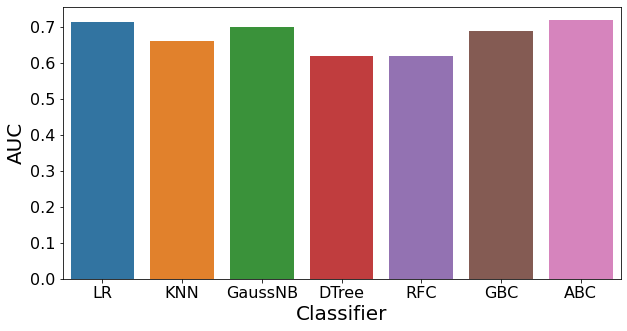

In [68]:
plt.subplots(figsize=(10,5)) 


ax = sns.barplot(x=df_result["Classifier"], y=df_result["Results"], data=df_result)

ax.set_xlabel('Classifier',fontsize = 20)
ax.set_ylabel('AUC', fontsize = 20)
plt.show()

### Top 3 Models
From the above results, We can choose our Top 3 models

In [69]:
df_result.sort_values('Results', ascending=False).head(3)

,Classifier,Results
6,ABC,0.719792
0,LR,0.714467
2,GaussNB,0.700635


In [70]:
base_results_dict =  df_result.set_index('Classifier')['Results'].to_dict()

## Hyperparameter Tuning  
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are learned.  
- We can use the Hyperparameter Tuning to obtain the set of best possible Hyperparamters for our learning models.  
- We will be using the technique called RandomizedSearchCV to obltain our best hyperparmeters.
- We will try to optimize our to three models.
 - LogisticRegression()
 - GradientBoostingClassifier()
 - AdaBoostClassifier()
- **Note:** The Optimization algorithm cannot be tested upto it's full potential due to hardware limitations.

In [71]:
opt_aucs = []
opt_names = []
def get_opt_report(name, classifier, x_test, y_test, y_pred):
    opt_names.append(name)
    s_time = time()
    accuracies = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)
    report = ''
    report += f'Report for {classifier}\n'
    report += f'{name} Confusion matrix:\n'
    report += f'{confusion_matrix(y_test, y_pred)}\n\n'
    report += f'{name} accuracy mean: {accuracies.mean()}\n'
    report += f'{name} accuracy std dev: {accuracies.std()}\n'
    report += f'{name} preciosn score: {precision_score(y_test, y_pred)}\n'
    report += f'{name} recall score: {recall_score(y_test, y_pred)}\n'
    report += f'{name} f1 score: {f1_score(y_test, y_pred)}\n'
    auc = roc_auc_score(y_test, y_pred)
    report += f'{name} Optimized AUC test: {auc}\n'
    opt_aucs.append(auc)
    report += f'\nClassification report: \n{classification_report(y_test, y_pred)}'
    report += f'\nTime taken: {time() - s_time}\n'
    report += '*'*50
    return report

In [72]:
from sklearn.model_selection import GridSearchCV


def hypertuning_gscv(est, p_distr):
    grid_search = GridSearchCV(est, param_grid=p_distr,
                                  n_jobs=-1, cv=9, scoring='accuracy')
    #CV = Cross-Validation ( here using Stratified KFold CV)
    grid_search.fit(x_train, y_train)
    ht_params = grid_search.best_params_
    ht_score = grid_search.best_score_
    return ht_params, ht_score

In [73]:
s_time = time()
est = LogisticRegression(n_jobs=-1)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

lr_parameters, lr_ht_score = hypertuning_gscv(est, grid)

lr_time = time() - s_time

# Print best parameters and score for LR

print(f"LR parameters: {lr_parameters}")
print(f"LR score: {lr_ht_score}")
print(f"Time taken: {lr_time}")

# LR parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
# LR score: 0.8246899390575385
# Time taken: 40.144261837005615

LR parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LR score: 0.7172987924635377
Time taken: 14.7022066116333


In [74]:
n_estimators = [10, 20]
learning_rate = [0.001, 0.01, 0.1, 1.0]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [75]:
# #GBC
# s_time = time()
# est = GradientBoostingClassifier()

# n_estimators = [10, 20]
# learning_rate = [0.001, 0.01, 0.1, 1.0]
# subsample = [0.5, 0.7, 1.0]
# max_depth = [3, 7, 9]
# # define grid search
# grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

# gbc_parameters, gbc_ht_score = hypertuning_gscv(est, grid)

# gbc_time = time() - s_time

# # Print best parameters and score for GBC

# print(f"GBC parameters: {gbc_parameters}")
# print(f"GBC score: {gbc_ht_score}")
# print(f"Time taken: {gbc_time}")


In [76]:
#ABC
s_time = time()
est = AdaBoostClassifier()

algorithm= ['SAMME', 'SAMME.R']

grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, algorithm=algorithm)

abc_parameters, abc_ht_score = hypertuning_gscv(est, grid)

abc_time = time() - s_time

# Print best parameters and score for ABC
print(f"ABC parameters: {abc_parameters}")
print(f"ABC score: {abc_ht_score}")
print(f"Time taken: {abc_time}")

ABC parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 20}
ABC score: 0.7211885722758254
Time taken: 39.590755224227905


In [77]:
# # # knn
# s_time = time()
# est = KNeighborsClassifier
# n_neighbors = range(1, 21, 2)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']
# # define grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

# knn_parameters, knn_ht_score = hypertuning_gscv(est, grid)

# knn_time = time() - s_time

# # Print best parameters and score for ABC
# print(f"KNN parameters: {knn_parameters}")
# print(f"KNN score: {knn_ht_score}")
# print(f"Time taken: {knn_time}")

In [78]:
# nb
s_time = time()
est = GaussianNB()
var_smoothing= np.logspace(0,-9, num=100)
# define grid search
grid = dict(var_smoothing=var_smoothing)

gnb_parameters, gnb_ht_score = hypertuning_gscv(est, grid)

gnb_time = time() - s_time

# Print best parameters and score for ABC
print(f"GaussNB parameters: {gnb_parameters}")
print(f"GaussNB score: {gnb_ht_score}")
print(f"Time taken: {gnb_time}")

GaussNB parameters: {'var_smoothing': 0.002848035868435802}
GaussNB score: 0.7015443818425479
Time taken: 12.355101823806763


In [79]:
# # dt 
# s_time = time()
# est = GaussianNB()
# criterion = [“gini”, “entropy”]
# splitter = [“best”, “random”]
# max_depth = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
# # define grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

# dt_parameters, dt_ht_score = hypertuning_gscv(est, grid)

# dt_time = time() - s_time

# # Print best parameters and score for ABC
# print(f"DTree parameters: {dt_parameters}")
# print(f"DTree score: {dt_ht_score}")
# print(f"Time taken: {dt_time}")

In [80]:
# # rfc
# s_time = time()
# est = RandomForestClassifier()
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

# rfc_parameters,rfc_ht_score = hypertuning_gscv(est, grid)

# rfc_time = time() - s_time

# # Print best parameters and score for ABC
# print(f"RFC parameters: {rfc_parameters}")
# print(f"RFC score: {rfc_ht_score}")
# print(f"Time taken: {rfc_time}")

In [81]:
hyperparameters = ''
hyperparameters += f'LR parameters: {lr_parameters}\nLR score: {lr_ht_score}\nTime taken: {lr_time}\n\n'
hyperparameters += f'GaussNB parameters: {gnb_parameters}\nGBC score: {gnb_ht_score}\nTime taken: {abc_time}\n\n'
hyperparameters += f'ABC parameters: {abc_parameters}\nABC score: {abc_ht_score}\nTime taken: {abc_time}\n\n'

In [82]:
print(hyperparameters)

LR parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LR score: 0.7172987924635377
Time taken: 14.7022066116333

GaussNB parameters: {'var_smoothing': 0.002848035868435802}
GBC score: 0.7015443818425479
Time taken: 39.590755224227905

ABC parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 20}
ABC score: 0.7211885722758254
Time taken: 39.590755224227905




In [83]:
opt_models = {'Optimized_LR': LogisticRegression(n_jobs=-1, C= 0.1, penalty= 'l2', solver= 'newton-cg'),
        
              'Optimized_GaussNB': GaussianNB(var_smoothing = 0.0657933224657568),
              
              'Optimized_ABC': AdaBoostClassifier(n_estimators= 20, learning_rate= 1.0, algorithm= 'SAMME.R'),
             }

log = ''
    
for name, classifier in opt_models.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    report = get_opt_report(name, classifier, x_test, y_test, y_pred)
    print(report)
    log += report
    log += '\n'

Report for LogisticRegression(C=0.1, n_jobs=-1, solver='newton-cg')
Optimized_LR Confusion matrix:
[[8020 2948]
 [ 420  969]]

Optimized_LR accuracy mean: 0.8956061737615135
Optimized_LR accuracy std dev: 0.0036423182458567046
Optimized_LR preciosn score: 0.24738320142966555
Optimized_LR recall score: 0.6976241900647948
Optimized_LR f1 score: 0.36524689031285335
Optimized_LR Optimized AUC test: 0.7144211395254682

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     10968
           1       0.25      0.70      0.37      1389

    accuracy                           0.73     12357
   macro avg       0.60      0.71      0.60     12357
weighted avg       0.87      0.73      0.77     12357

Time taken: 0.6495697498321533
**************************************************
Report for GaussianNB(var_smoothing=0.0657933224657568)
Optimized_GaussNB Confusion matrix:
[[8897 2071]
 [ 585  804]]

Optimized_GaussNB accuracy me

In [84]:
# with open('opt_logs\opt_log_report.log', 'w') as writer:
#         writer.write(log)

In [85]:
# with open('opt_logs\optimized_hyperparameter.log', 'w') as writer:
#         writer.write(hyperparameters)

In [86]:
df_opt_result = pd.DataFrame({'Classifier': opt_names, 'Results': opt_aucs})

In [87]:
df_opt_result.sort_values('Results', ascending = False)

,Classifier,Results
2,Optimized_ABC,0.719867
0,Optimized_LR,0.714421
1,Optimized_GaussNB,0.695006


In [88]:
opt_results_dict =  df_opt_result.set_index('Classifier')['Results'].to_dict()

In [89]:
df_opt_results = pd.DataFrame({'classifier':['LR','LR','GaussNB','GaussNB','ABC','ABC'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[base_results_dict['LR'], opt_results_dict['Optimized_LR'],
                                 base_results_dict['GaussNB'] , opt_results_dict['Optimized_GaussNB'],
                                 base_results_dict['ABC'], opt_results_dict['Optimized_ABC']
                                ]
                          })

In [90]:
df_opt_results

,classifier,data_set,auc
0,LR,baseline,0.714467
1,LR,optimized,0.714421
2,GaussNB,baseline,0.700635
3,GaussNB,optimized,0.695006
4,ABC,baseline,0.719792
5,ABC,optimized,0.719867


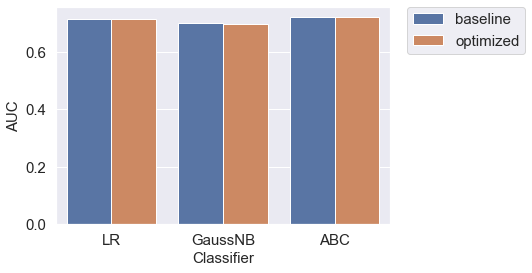

In [91]:
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_opt_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Finalizing the Model
- Though all the top 3 Models are performing equally well. We will choose the **Optimzed AdaBoostClassifer** as our final model.
- **RandomForestClassifer** is giving us an *accuracy mean, and an AUC of 0.81.*

### ROC Curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- **True Positive Rate:** The true positive rate (TPR, also called sensitivity) is calculated as TP/TP+FN. TPR is the probability that an actual positive will test positive.
- **False Positive Rate:** The false positive rate is calculated as FP/FP+TN. TPR is the probability that an actual negative will test positive.

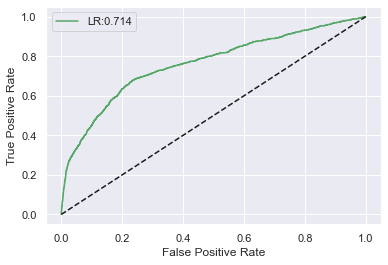

In [92]:
from sklearn.metrics import roc_curve 

false_pr_test, true_pr_test, thresholds_test = roc_curve(y_test, opt_models["Optimized_LR"].predict_proba(x_test)[:,1])

auc_test = opt_aucs[0]

plt.plot(false_pr_test, true_pr_test, 'g-',label ='LR:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

- The AUC achieved by this model is 71%.
- It means the model gives us 20% better results over randomly guessing (If we take the efficiency of random guesses as 50%).

### Important Features
Let's have a look at the features important for our prediction and try to found how much importnat each of the available feature is.

In [93]:
# model_columns = list(df_model.columns)[:-1]

feature_importances = pd.DataFrame(opt_models["Optimized_ABC"].feature_importances_, index = model_columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head()

NameError: name 'model_columns' is not defined

In [ ]:
feature_importances.index

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.barh(feature_importances.index[::-1], feature_importances["importance"][::-1], align="center")
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.grid(axis = 'y')
plt.show()

# The graph below will show the contribution of each featuure in the final prediction

In [ ]:
important_features = list(feature_importances.index)[:2]
important_features

### Let's try to describe our Subscribing customers on the basis of important features

In [ ]:
df_sub = df_model[df_model['subscribed']==1][important_features]
df_sub.describe()

### Let's try to describe our Non-Subscribing customers on the basis of important features

In [ ]:
df_no_sub = df_model[df_model['subscribed']==0][important_features]
df_no_sub.describe()

In [ ]:
for feature_index in range(0, len(important_features), 2):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='subscribed', y=important_features[feature_index], data=df_model)
    
    feature_index += 1
    plt.subplot(1, 2, 2)
    sns.boxplot(x='subscribed', y=important_features[feature_index], data=df_model)
    
    plt.tight_layout()
    plt.show()

### Deployment of the selected model
- We can now use the pickle module to save our model in a pickle file.
- We can then use the pickle file for the deployment of our model with flask.
- The final deployed project will be a flask web application.

## Conclusion
- We have created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was Logistic Regression Classifier. The model's performance accuracy is 89%.
- We should focus on targeting customers with higher call duration as they are high importance features for the model and business.
- For the 'duration' feature the value of first quartile is 243 we should focus on the customers with whom we are having  communications this long.  
- Instead of reaching out to more customers on a certain date of the month the campaigners
- Though We can't see any clear cut representation of subscribers having a specific range of account balance, still we should focus more on the customers having an account balance of more than 203 Euros as it is the first quartile values for  the same.
- Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.
- We have executed and tested all the models multiple times meanwhile logging each test run in different log files.
- The log files can be used as a reference when trying to modify/revise the current model in future.
